<h1>Realisation de TP01</h1>

<h2>Algorithme de KNN</h2>

<h3>Real data</h3>

In [1]:
#Importation des packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split , KFold
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

from collections import Counter

<h3>Load data</h3>

In [2]:
#1/- Ouverture de benchmarks
data_iris = datasets.load_iris()

In [3]:
#2/- Nbre d’instances, nbre d’attributs
dataFrameIris = pd.DataFrame(data= np.c_[data_iris['data'], data_iris['target']],columns= data_iris['feature_names']+['class'])
dataFrameIris
print("Nbre d’instances est : " , len(dataFrameIris.axes[0]))
print("Nbre d’attributs est : " , len(dataFrameIris.axes[1]))
dataFrameIris

Nbre d’instances est :  150
Nbre d’attributs est :  5


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [4]:
#3/- Vérifer si des valeurs NULL dans ce banchmark
isNull = dataFrameIris.isna()
print(isNull)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                False             False              False             False   
1                False             False              False             False   
2                False             False              False             False   
3                False             False              False             False   
4                False             False              False             False   
..                 ...               ...                ...               ...   
145              False             False              False             False   
146              False             False              False             False   
147              False             False              False             False   
148              False             False              False             False   
149              False             False              False             False   

     class  
0    False  
1

In [5]:
#4/- afficher les types des attributes
dataFrameIris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   class              150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [68]:
dataFrameIris["sepal length (cm)"].describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal length (cm), dtype: float64

In [62]:
#4/- le Q1 et Q3 "sepal length (cm)"
sepal_length_Q1 = dataFrameIris["sepal length (cm)"].quantile(0.25)
sepal_length_Q3 = dataFrameIris["sepal length (cm)"].quantile(0.75)
print("Q1 est : ", sepal_length_Q1, "Q3 est : ", sepal_length_Q3)
#calculer le Outlier
IQR_Sepal_length = sepal_length_Q3 - sepal_length_Q1
print("IQR de sepal_length : ", IQR_Sepal_length)
ul = sepal_length_Q3 +1.5*IQR_Sepal_length
ll = sepal_length_Q1 -1.5*IQR_Sepal_length
outliers = dataFrameIris["sepal length (cm)"][(dataFrameIris["sepal length (cm)"] > ul) | (dataFrameIris["sepal length (cm)"] < ll)]
print("The outliers is ",outliers)

Q1 est :  5.1 Q3 est :  6.4
IQR de sepal_length :  1.3000000000000007
The outliers is  Series([], Name: sepal length (cm), dtype: float64)


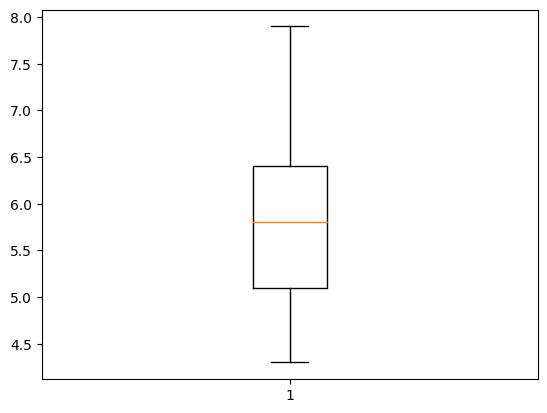

In [7]:
plt.boxplot(dataFrameIris["sepal length (cm)"])
plt.show()

In [69]:
dataFrameIris["sepal width (cm)"].describe()

count    150.000000
mean       3.057333
std        0.435866
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: sepal width (cm), dtype: float64

In [61]:
#4/- le Q1 et Q3 "sepal width (cm)"
sepal_width_Q1 = dataFrameIris["sepal width (cm)"].quantile(0.25)
sepal_width_Q3 = dataFrameIris["sepal width (cm)"].quantile(0.75)
print("Q1 est : ", sepal_width_Q1, "Q3 est : ", sepal_width_Q3)
#calculer le Outlier
IQR_Sepaal_width = sepal_width_Q3 - sepal_width_Q1
print("IQR de sepal_width : ", IQR_Sepaal_width)
ul = sepal_width_Q3 +1.5*IQR_Sepaal_width
ll = sepal_width_Q1 -1.5*IQR_Sepaal_width
outliers = dataFrameIris["sepal width (cm)"][(dataFrameIris["sepal width (cm)"] > ul) | (dataFrameIris["sepal width (cm)"] < ll)]
print("The outliers is ",outliers)

Q1 est :  2.8 Q3 est :  3.3
IQR de sepal_width :  0.5
The outliers is  15    4.4
32    4.1
33    4.2
60    2.0
Name: sepal width (cm), dtype: float64


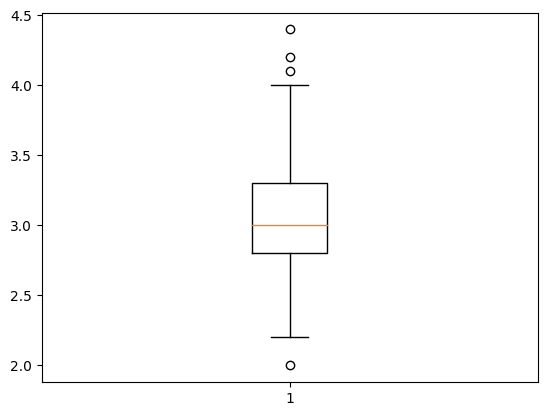

In [50]:
plt.boxplot(dataFrameIris["sepal width (cm)"])
plt.show()

In [70]:
dataFrameIris["petal length (cm)"].describe()

count    150.000000
mean       3.758000
std        1.765298
min        1.000000
25%        1.600000
50%        4.350000
75%        5.100000
max        6.900000
Name: petal length (cm), dtype: float64

In [63]:
#4/- le Q1 et Q3 "petal length (cm)"
petal_length_Q1 = dataFrameIris["petal length (cm)"].quantile(0.25)
petal_length_Q3 = dataFrameIris["petal length (cm)"].quantile(0.75)
print("Q1 est : ", petal_length_Q1, "Q3 est : ", petal_length_Q3)
#calculer le Outlier
IQR_Petal_length = petal_length_Q3 - petal_length_Q1
print("IQR de sepal_length : ", IQR_Petal_length)
ul = petal_length_Q3 +1.5*IQR_Petal_length
ll = petal_length_Q1 -1.5*IQR_Petal_length
outliers = dataFrameIris["petal length (cm)"][(dataFrameIris["petal length (cm)"] > ul) | (dataFrameIris["petal length (cm)"] < ll)]
print("The outliers is ",outliers)

Q1 est :  1.6 Q3 est :  5.1
IQR de sepal_length :  3.4999999999999996
The outliers is  Series([], Name: petal length (cm), dtype: float64)


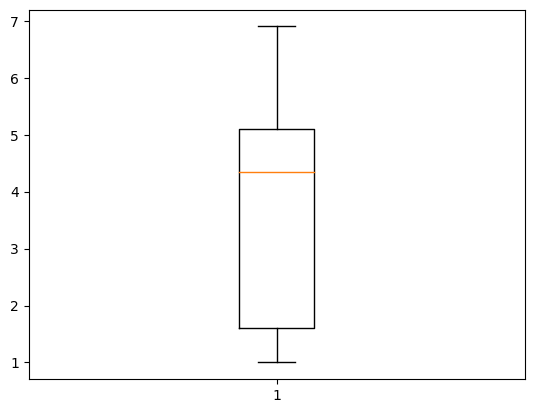

In [53]:
plt.boxplot(dataFrameIris["petal length (cm)"])
plt.show()

In [71]:
dataFrameIris["petal width (cm)"].describe()

count    150.000000
mean       1.199333
std        0.762238
min        0.100000
25%        0.300000
50%        1.300000
75%        1.800000
max        2.500000
Name: petal width (cm), dtype: float64

In [64]:
#4/- le Q1 et Q3 "sepal length (cm)"
petal_width_Q1 = dataFrameIris["petal width (cm)"].quantile(0.25)
petal_width_Q3 = dataFrameIris["petal width (cm)"].quantile(0.75)
print("Q1 est : ", petal_width_Q1, "Q3 est : ", sepal_width_Q3)
#calculer le Outlier
IQR_Petal_width = petal_width_Q3 - petal_width_Q1
print("IQR de sepal_width : ", IQR_Petal_width)
ul = petal_width_Q3 +1.5*IQR_Petal_width
ll = petal_width_Q1 -1.5*IQR_Petal_width
outliers = dataFrameIris["petal width (cm)"][(dataFrameIris["petal width (cm)"] > ul) | (dataFrameIris["petal width (cm)"] < ll)]
print("The outliers is ",outliers)

Q1 est :  0.3 Q3 est :  3.3
IQR de sepal_width :  1.5
The outliers is  Series([], Name: petal width (cm), dtype: float64)


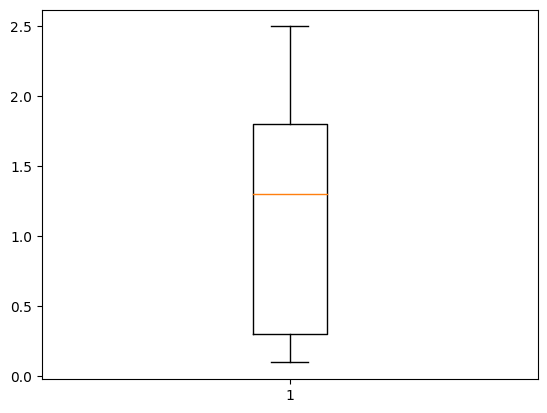

In [65]:
plt.boxplot(dataFrameIris["petal width (cm)"])
plt.show()

In [14]:
#Importation de iris dataset
data_iris = datasets.load_iris()
#la concatination
iris_df = pd.DataFrame(data= np.c_[data_iris['data'], data_iris['target']],columns= data_iris['feature_names']+['target'])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


<h3>Data summary</h3>

In [15]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [16]:
#Diviser pour X et Y
x= iris_df.iloc[:, :-1]
y= iris_df.iloc[:, -1]

In [17]:
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

In [19]:
#Diviser le benchmarck pour data training et data test
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, shuffle= True, # Mélanger les données pour éviter les biais
                                                                                                                            random_state= 0) 

In [20]:
x_train= np.asarray(x_train)
y_train= np.asarray(y_train)

x_test= np.asarray(x_test)
y_test= np.asarray(y_test)

In [21]:
print(f'training set size: {x_train.shape[0]} samples \ntest set size: {x_test.shape[0]} samples')

training set size: 120 samples 
test set size: 30 samples


<h3>Normalize the Dataset</h3>

In [22]:
#La normalization de dataset
scaler= Normalizer().fit(x_train) # the scaler is fitted to the training set
normalized_x_train= scaler.transform(x_train) # the scaler is applied to the training set
normalized_x_test= scaler.transform(x_test) # the scaler is applied to the test set

In [23]:
print('x train avant la normalization')
print(x_train[0:5])
print('\nx train apres la normalization')
print(normalized_x_train[0:5])
nbtrain = len(x_train)
print("la nombre de training data est :",nbtrain)
nbtest = len(x_test)
print("la nombre de testing data est :",nbtest)

x train avant la normalization
[[6.4 3.1 5.5 1.8]
 [5.4 3.  4.5 1.5]
 [5.2 3.5 1.5 0.2]
 [6.1 3.  4.9 1.8]
 [6.4 2.8 5.6 2.2]]

x train apres la normalization
[[0.69804799 0.338117   0.59988499 0.196326  ]
 [0.69333409 0.38518561 0.57777841 0.1925928 ]
 [0.80641965 0.54278246 0.23262105 0.03101614]
 [0.71171214 0.35002236 0.57170319 0.21001342]
 [0.69417747 0.30370264 0.60740528 0.2386235 ]]
la nombre de training data est : 120
la nombre de testing data est : 30


Text(0.5, 1.08, 'le Plot de dataset apres la normalization')

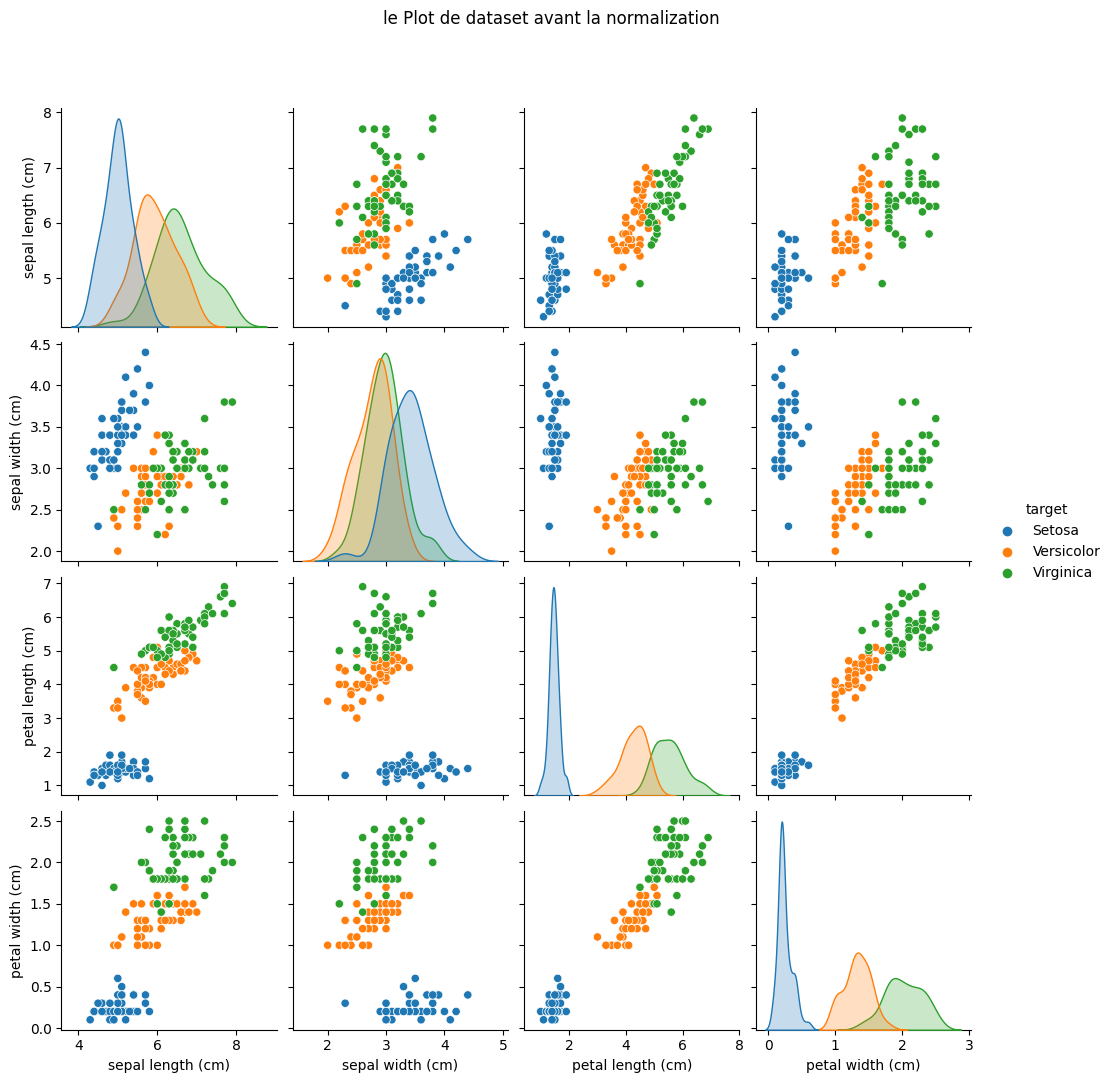

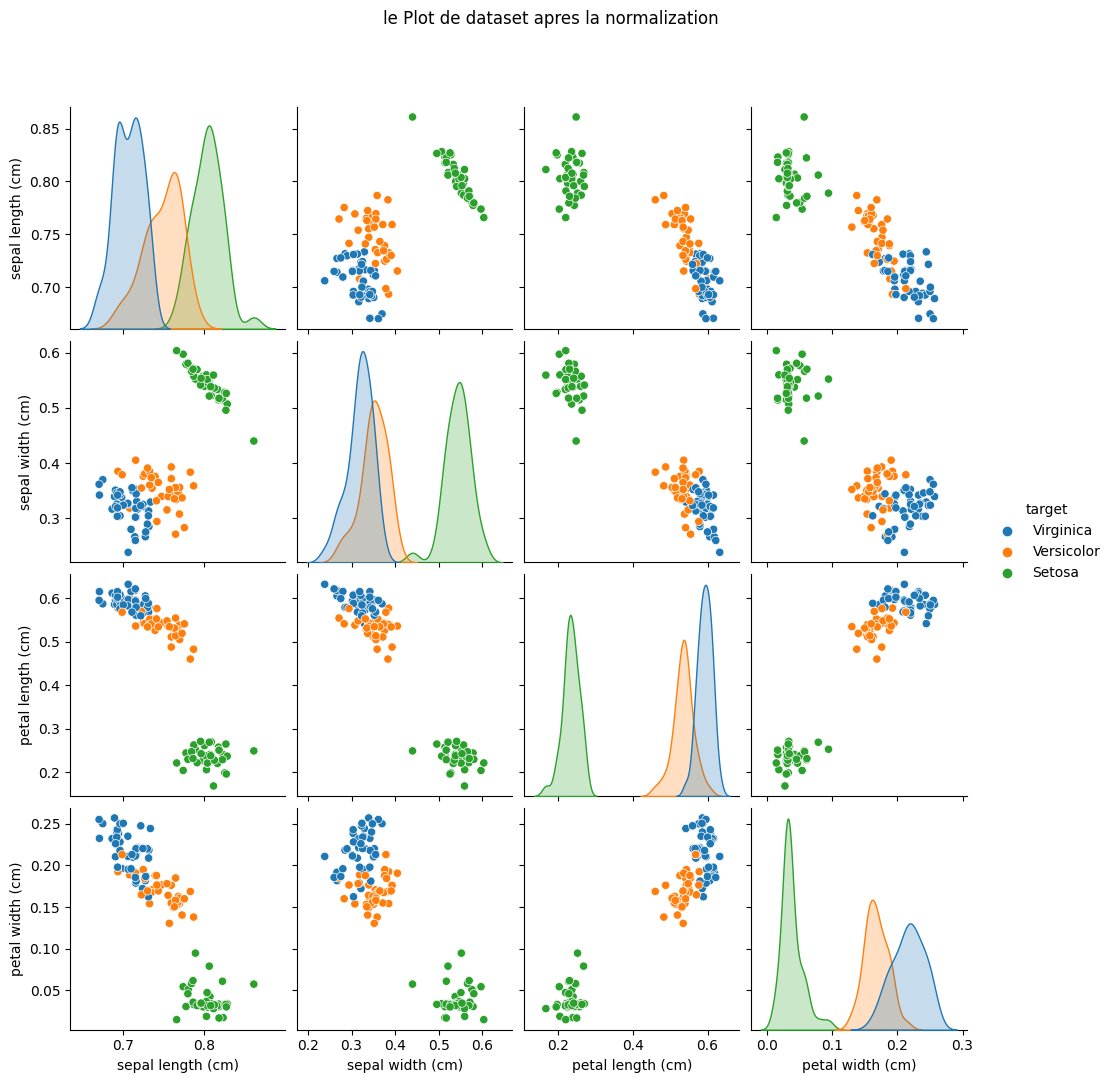

In [24]:
#Avant
di= {0.0: 'Setosa', 1.0: 'Versicolor', 2.0:'Virginica'}

before= sns.pairplot(iris_df.replace({'target': di}), hue= 'target')
before.fig.suptitle('le Plot de dataset avant la normalization', y=1.08)

#Apres
iris_df_2= pd.DataFrame(data= np.c_[normalized_x_train, y_train],
                        columns= data_iris['feature_names'] + ['target'])
di= {0.0: 'Setosa', 1.0: 'Versicolor', 2.0: 'Virginica'}
after= sns.pairplot(iris_df_2.replace({'target':di}), hue= 'target')
after.fig.suptitle('le Plot de dataset apres la normalization', y=1.08)

<h2>l'implementation de KNN</h2>

<h3>Etape 01 la distance eucliden</h3>

In [25]:
def distance_ecu(x_train, x_test_point):
  """
  les entres:
    - x_train: correspondant de le training data
    - x_test_point: correspondant de le test point

  les sorties:
    -distances: The distances entre le test point et  chaque point sur le training data.

  """
  distances= []  #cration de liste vide
  for row in range(len(x_train)): #boucler tout les lignes de x_train
      current_train_point = x_train[row] #prendre point par point
      current_distance = 0 #initialize la distance par zero

      for col in range(len(current_train_point)): #boucler to les columns de le ligne
          current_distance += (current_train_point[col] - x_test_point[col]) **2
          #la distance currant = current_distance + (x_train[i] - x_test_point[i])**2
      current_distance= np.sqrt(current_distance)

      distances.append(current_distance) # Append the distances

  #Store distances in a dataframe
  distances= pd.DataFrame(data=distances,columns=['dist'])
  return distances


<h3>Etape 02 trouver les voisins les plus proches</h3>

In [26]:
def nearest_neighbors(distance_point, K):
    """
    les entres:
        -distance_point: la distances entre les test point et chaque point sur le training data.
        -K             : Le nombre de voisin

    les sorties:
        -df_nearest: le plus proche K voisins entre les test point and le training data.
    """

    # Sort values using the sort_values function
    df_nearest= distance_point.sort_values(by=['dist'], axis=0)

    # Prendre sulement les premiers K voisins
    df_nearest= df_nearest[:K]
    return df_nearest

<h3>Etape 03 Classer le point en fonction d'un vote majoritaire</h3>

In [27]:
def voting(df_nearest, y_train):
    """
    Input:
        -df_nearest: dataframe contains the nearest K neighbors between the full training dataset and the test point.
        -y_train: the labels of the training dataset.

    Output:
        -y_pred: the prediction based on Majority Voting

    """

    ## Use the Counter Object to get the labels with K nearest neighbors.
    counter_vote= Counter(y_train[df_nearest.index])

    y_pred= counter_vote.most_common()[0][0]   # Majority Voting

    return y_pred


In [28]:
def KNN_from_scratch(x_train, y_train, x_test, K):

    """
    les entres:
    -x_train: l'ensemble de training dataset complet 
    -y_train: les étiquettes de the training dataset
    -x_test: le test dataset complet 
    -K: le number de voisins

    les sorties:
    -y_pred: la prediction pour tout test set based on Majorité de Voting.

    """

    y_pred=[]

    ## Loop over all the test set and perform the three steps
    for x_test_point in x_test:
      distance_point  = distance_ecu(x_train, x_test_point)  ## Step 1
      df_nearest_point= nearest_neighbors(distance_point, K)  ## Step 2
      y_pred_point    = voting(df_nearest_point, y_train) ## Step 3
      y_pred.append(y_pred_point)

    return y_pred  

In [29]:
K=3
y_pred_scratch= KNN_from_scratch(normalized_x_train, y_train, normalized_x_test, K)
print(y_pred_scratch)

[2.0, 1.0, 0.0, 2.0, 0.0, 2.0, 0.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 2.0, 0.0, 0.0, 2.0, 1.0, 0.0, 0.0, 2.0, 0.0, 0.0, 1.0, 1.0, 0.0]


In [30]:
def KNN_from_scratch(x_train, y_train, x_test, K):
    """
    Input:
    -x_train: the full training dataset
    -y_train: the labels of the training dataset
    -x_test: the full test dataset
    -K: the number of neighbors

    Output:
    -y_pred: the prediction for the whole test set based on Majority Voting.

    """
    y_pred=[]

    ## Loop over all the test set and perform the three steps
    for x_test_point in x_test:
      distance_point  = distance_ecu(x_train, x_test_point)  ## Step 1
      df_nearest_point= nearest_neighbors(distance_point, K)  ## Step 2
      y_pred_point    = voting(df_nearest_point, y_train) ## Step 3
      y_pred.append(y_pred_point)

    return y_pred  

In [31]:
K=3
y_pred_scratch= KNN_from_scratch(normalized_x_train, y_train, normalized_x_test, K)
print(y_pred_scratch)

[2.0, 1.0, 0.0, 2.0, 0.0, 2.0, 0.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 2.0, 0.0, 0.0, 2.0, 1.0, 0.0, 0.0, 2.0, 0.0, 0.0, 1.0, 1.0, 0.0]


<h3>With sklearn</h3>

In [32]:
knn=KNeighborsClassifier(K)
knn.fit(normalized_x_train, y_train)
y_pred_sklearn= knn.predict(normalized_x_test)
print(y_pred_sklearn)

[2. 1. 0. 2. 0. 2. 0. 1. 1. 1. 2. 1. 1. 1. 1. 0. 1. 2. 0. 0. 2. 1. 0. 0.
 2. 0. 0. 1. 1. 0.]


In [33]:
print(np.array_equal(y_pred_sklearn, y_pred_scratch))

True


<h3>Calculer la préscision de les du facon</h3>

In [34]:
print(f"La précision de ma implémentation est {accuracy_score(y_test, y_pred_scratch)}")
print(f"La précision de l'implémentation de sklearn est {accuracy_score(y_test, y_pred_sklearn)}")

La précision de ma implémentation est 0.9666666666666667
La précision de l'implémentation de sklearn est 0.9666666666666667


<h2>l'implementation de Naive Base</h2>

In [35]:
#Importation de iris dataset
data_diabetes = datasets.load_diabetes()
#la concatination
diabetes_df = pd.DataFrame(data= np.c_[data_diabetes['data'], data_diabetes['target']],columns= data_diabetes['feature_names']+['target'])
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [36]:
diabetes_df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [37]:
#Diviser pour X et Y
x_dbt= diabetes_df.iloc[:, :-1]
y_dbt= diabetes_df.iloc[:, -1]

In [38]:
x_dbt.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [39]:
x_train, x_test, y_train, y_test= train_test_split(x_dbt, y_dbt, test_size= 0.2, shuffle= True, # Mélanger les données pour éviter les biais
                                                                                                                            random_state= 0)

In [40]:
x_train= np.asarray(x_train)
y_train= np.asarray(y_train)

x_test= np.asarray(x_test)
y_test= np.asarray(y_test)


In [41]:
print(f'training set size: {x_train.shape[0]} samples \ntest set size: {x_test.shape[0]} samples')

training set size: 353 samples 
test set size: 89 samples


In [42]:
#La normalization de dataset
scaler= Normalizer().fit(x_train) # the scaler is fitted to the training set
normalized_x_train= scaler.transform(x_train) # the scaler is applied to the training set
normalized_x_test= scaler.transform(x_test) # the scaler is applied to the test set

In [43]:
print('x train avant la normalization')
print(x_train[0:5])
print('\nx train apres la normalization')
print(normalized_x_train[0:5])
nbtrain = len(x_train)
print("la nombre de training data est :",nbtrain)
nbtest = len(x_test)
print("la nombre de testing data est :",nbtest)

x train avant la normalization
[[ 0.01264814  0.05068012  0.00241654  0.0563009   0.02732605  0.01716188
   0.04127682 -0.03949338  0.00370906  0.07348023]
 [-0.10722563 -0.04464164 -0.07734155 -0.02632753 -0.08962994 -0.09619786
   0.02655027 -0.0763945  -0.04257085 -0.0052198 ]
 [ 0.02717829  0.05068012 -0.03530688  0.03220094 -0.01120063  0.00150446
  -0.01026611 -0.00259226 -0.01495969 -0.05078298]
 [-0.00551455  0.05068012  0.00133873 -0.08485599 -0.01120063 -0.01665815
   0.0486401  -0.03949338 -0.04117617 -0.08806194]
 [ 0.06713621  0.05068012  0.02073935 -0.00567042  0.02044629  0.02624319
  -0.00290283 -0.00259226  0.0086406   0.00306441]]

x train apres la normalization
[[ 0.10119505  0.40548081  0.01933424  0.45045145  0.2186299   0.13730855
   0.33024706 -0.31597813  0.0296754   0.58789961]
 [-0.50085107 -0.20852114 -0.36126249 -0.12297592 -0.41866158 -0.44934034
   0.12401636 -0.35683883 -0.19884852 -0.02438171]
 [ 0.29250794  0.54544772 -0.37999235  0.34656447 -0.12054743

KeyboardInterrupt: 

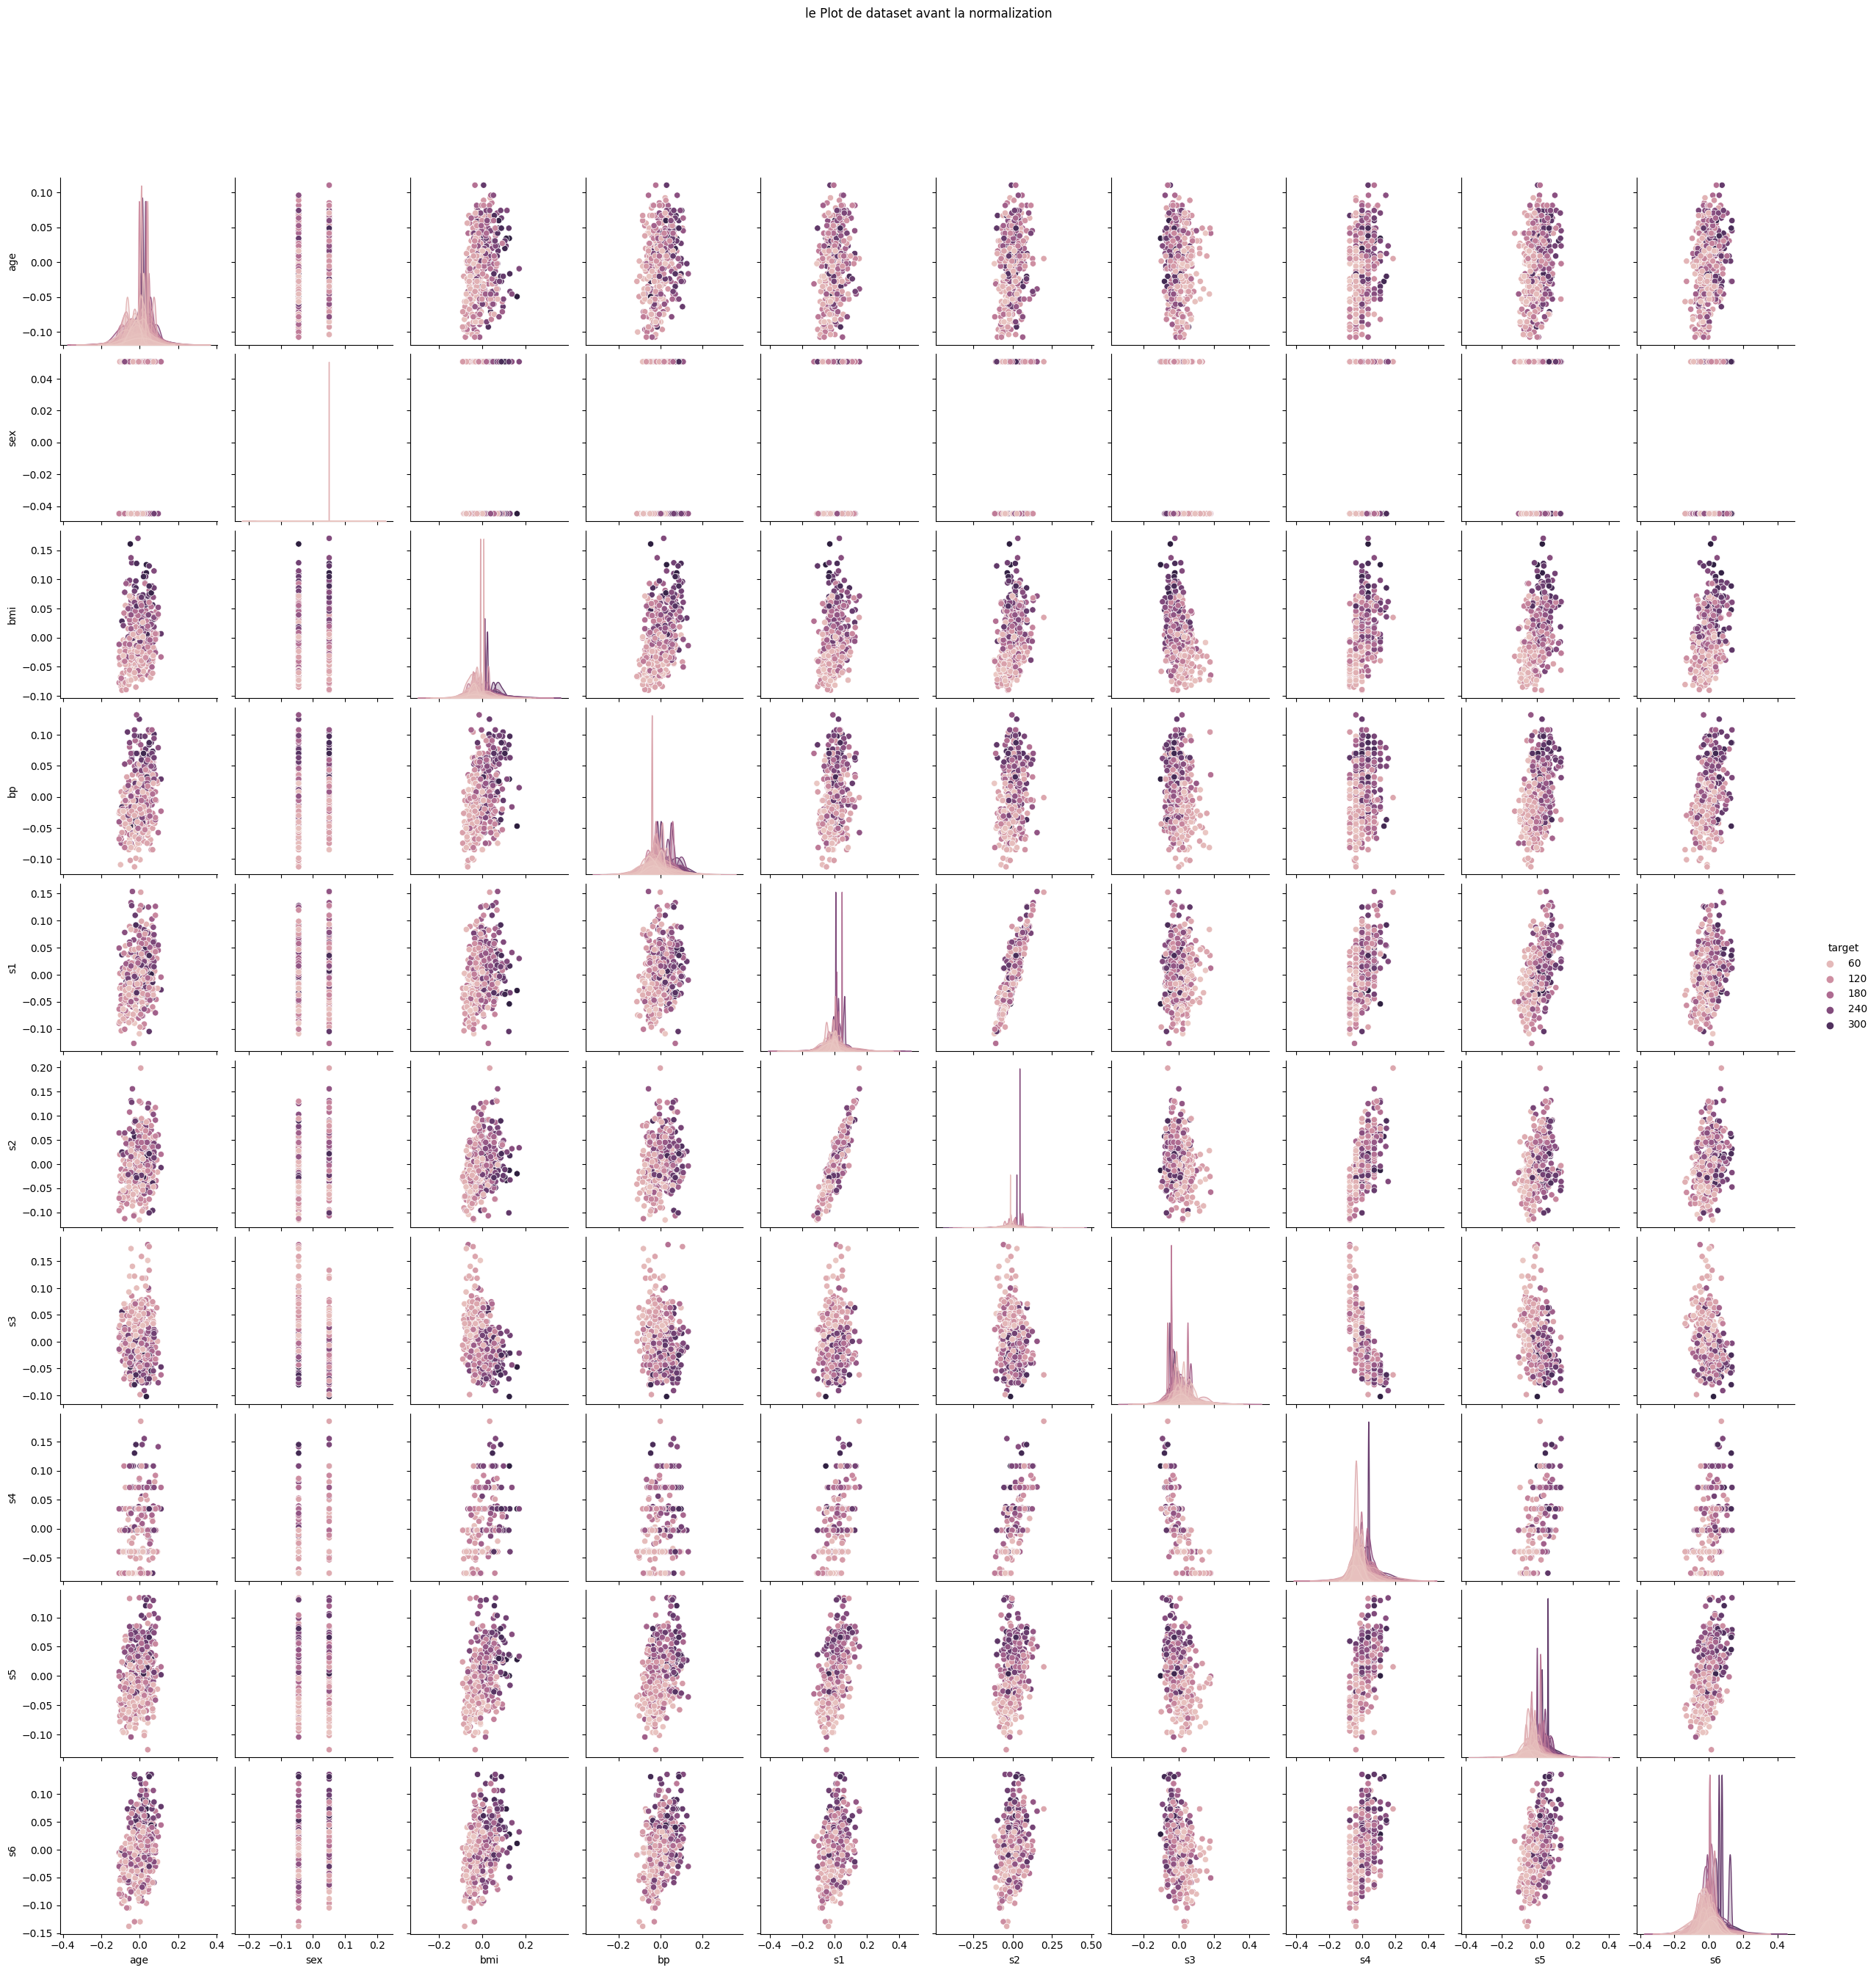

Error in callback <function flush_figures at 0x00000214FC0B4940> (for post_execute):


KeyboardInterrupt: 

In [44]:
#Avant
di= {0.0: 'Sex', 1.0: 'Age', 2.0:'bmi', 3.0:'bp'}

before= sns.pairplot(diabetes_df.replace({'target': di}), hue= 'target')
before.fig.suptitle('le Plot de dataset avant la normalization', y=1.08)

#Apres
diabetes_df_2= pd.DataFrame(data= np.c_[normalized_x_train, y_train],
                        columns= data_diabetes['feature_names'] + ['target'])
di= {0.0: 'Sex', 1.0: 'Age', 2.0:'bmi', 3.0:'bp'}
after= sns.pairplot(diabetes_df.replace({'target':di}), hue= 'target')
after.fig.suptitle('le Plot de dataset apres la normalization', y=1.08)

In [ ]:
def distance_ecu(x_train, x_test_point):
  """
  les entres:
    - x_train: correspondant de le training data
    - x_test_point: correspondant de le test point

  les sorties:
    -distances: The distances entre le test point et  chaque point sur le training data.

  """
  distances= []  #cration de liste vide
  for row in range(len(x_train)): #boucler tout les lignes de x_train
      current_train_point = x_train[row] #prendre point par point
      current_distance = 0 #initialize la distance par zero

      for col in range(len(current_train_point)): #boucler to les columns de le ligne
          current_distance += (current_train_point[col] - x_test_point[col]) **2
          #la distance currant = current_distance + (x_train[i] - x_test_point[i])**2
      current_distance= np.sqrt(current_distance)

      distances.append(current_distance) # Append the distances

  #Store distances in a dataframe
  distances= pd.DataFrame(data=distances,columns=['dist'])
  return distances


In [ ]:
def nearest_neighbors(distance_point, K):
    """
    les entres:
        -distance_point: la distances entre les test point et chaque point sur le training data.
        -K             : Le nombre de voisin

    les sorties:
        -df_nearest: le plus proche K voisins entre les test point and le training data.
    """

    # Sort values using the sort_values function
    df_nearest= distance_point.sort_values(by=['dist'], axis=0)

    # Prendre sulement les premiers K voisins
    df_nearest= df_nearest[:K]
    return df_nearest

In [ ]:
def voting(df_nearest, y_train):
    """
    Input:
        -df_nearest: dataframe contains the nearest K neighbors between the full training dataset and the test point.
        -y_train: the labels of the training dataset.

    Output:
        -y_pred: the prediction based on Majority Voting

    """

    ## Use the Counter Object to get the labels with K nearest neighbors.
    counter_vote= Counter(y_train[df_nearest.index])

    y_pred= counter_vote.most_common()[0][0]   # Majority Voting

    return y_pred


In [ ]:
def KNN_from_scratch(x_train, y_train, x_test, K):

    """
    les entres:
    -x_train: l'ensemble de training dataset complet 
    -y_train: les étiquettes de the training dataset
    -x_test: le test dataset complet 
    -K: le number de voisins

    les sorties:
    -y_pred: la prediction pour tout test set based on Majorité de Voting.

    """

    y_pred=[]

    ## Loop over all the test set and perform the three steps
    for x_test_point in x_test:
      distance_point  = distance_ecu(x_train, x_test_point)  ## Step 1
      df_nearest_point= nearest_neighbors(distance_point, K)  ## Step 2
      y_pred_point    = voting(df_nearest_point, y_train) ## Step 3
      y_pred.append(y_pred_point)

    return y_pred  

In [ ]:
K=3
y_pred_scratch= KNN_from_scratch(normalized_x_train, y_train, normalized_x_test, K)
print(y_pred_scratch)

[336.0, 258.0, 118.0, 201.0, 293.0, 275.0, 96.0, 178.0, 95.0, 310.0, 142.0, 122.0, 178.0, 77.0, 275.0, 43.0, 137.0, 96.0, 137.0, 281.0, 252.0, 60.0, 53.0, 210.0, 229.0, 262.0, 170.0, 72.0, 166.0, 122.0, 237.0, 63.0, 137.0, 206.0, 67.0, 246.0, 174.0, 77.0, 182.0, 296.0, 128.0, 292.0, 115.0, 265.0, 222.0, 63.0, 170.0, 113.0, 259.0, 296.0, 225.0, 72.0, 216.0, 168.0, 280.0, 181.0, 121.0, 152.0, 67.0, 196.0, 310.0, 25.0, 140.0, 111.0, 265.0, 113.0, 77.0, 306.0, 229.0, 72.0, 84.0, 202.0, 160.0, 141.0, 187.0, 107.0, 116.0, 272.0, 122.0, 67.0, 67.0, 164.0, 52.0, 310.0, 94.0, 153.0, 129.0, 126.0, 94.0]


In [ ]:
print(np.array_equal(y_pred_sklearn, y_pred_scratch))

False


In [ ]:
knn=KNeighborsClassifier(K)
knn.fit(normalized_x_train, y_train)
y_pred_sklearn= knn.predict(normalized_x_test)
print(y_pred_sklearn)

[131. 258. 118.  31.  48. 258.  63. 163.  95. 258. 142. 122.  71.  63.
 275.  43.  68.  52.  99. 261.  44.  60.  53.  84. 178.  78.  48.  60.
 166. 122. 185.  42. 137. 206.  67. 246. 174.  77.  48.  67.  72. 100.
  78. 127. 122.  63. 134.  60.  51. 104.  77.  43.  48. 102. 236.  91.
 121.  97.  67. 144.  78.  25.  91. 111. 265. 113.  63. 192. 178.  72.
  39.  69.  53.  65.  83. 107.  51. 217. 122.  67.  67. 129.  52. 310.
  55.  48.  60. 107.  72.]


In [ ]:
print(f"La précision de ma implémentation est {accuracy_score(y_test, y_pred_scratch)}")
print(f"La précision de l'implémentation de sklearn est {accuracy_score(y_test, y_pred_sklearn)}")

La précision de ma implémentation est 0.011235955056179775
La précision de l'implémentation de sklearn est 0.0
